# Intro to Neural Networks

<iframe src="https://giphy.com/embed/2bYewTk7K2No1NvcuK" width="480" height="269" style="" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/2bYewTk7K2No1NvcuK">via GIPHY</a></p>

In this unit we will discuss the following:
1. Taking inspiration from the neuron 
2. Combining Neurons
3. Stochastic gradient descent (SGD) and Loss
4. Hyper Parameter Tuning
5. Over/Under Fitting


## Taking Inspiration from the Neuron

We still do not understand 100% of how the brain works, however, naturally it seems, that if you want to have a computer learn you would try to simulate a brain. 

Our brain is made of neurons:

![https://www.geeksforgeeks.org/single-layer-perceptron-in-tensorflow/](./images/Biological-Neuron-and-similarity-with-neural-network.png)

The dendrite is the input of the neuron, the input can be an inhibitory signal, or a excitatory signal. Depending on the input the neuron will send a signal out of the axon, the output of the neuron. Inhibitory help prevent the neuron from firing and excitatory signals help the neuron to fire. These signals can be received from many oth neurons. Once the excitatory signals out weigh the inhibitory signals in some threshold the axon will fire. 


Lets try to model this with math! 


# The Perceptron

Lets build something called a perceptron. 

Let us start with one dendrite, a nucleus (which will hold our threshold), and an axon. 

The simplest neuron we can make is one that has no threshold and passes the input to the output

The mathmatical equivlent is $y=x$

<img src="./images/perceptron1.png" width="600">


Next we can add the threshold. Ideally we want to send out the axon if this is activate or not. One of our trusty friends we can use is the sigmoid!

This will take our input and create an output signal between 0 and 1. For our neuron output we can think of the neuron output of 1 as activating or the neuron firing. This can be thought of as the activation step of our output - so the sigmoid function in this case is called the activation function.

The mathematical equivalent is $y = sigmoid(x)$

<img src="./images/perceptron2.png" width="600">



How ever we can take in multiple inputs from other neurons. Then before our sigmoid function or activation function we accumulate the total and feed it in. 

This is now mathematically equivalent to 
$y = sigmoid( x1 + x2 + x3  )$

<img src="./images/perceptron3.png" width="600">


Since we may value certain neurons inputs differently we give a weight to each input.

Note that our weights can be negative! - This is where we get our inhibitory and excitatory behavior. In this specific example a positive weight would be excitatory and a negative weight would be inhibitory. (This is not always true and depend on your input value and threshold value as described below)

This is now mathematically equivalent to 
$y = sigmoid( w1 * x1 + w2 * x2 + w3 * x3  )$

<img src="./images/perceptron4.png" width="600">


Now we want to be able to alter our threshold. Rather an changing the activation function directly, we can change the threshold by adding a bias to the neuron. This is represented by B. 

This is also sometimes represented as a weight * 1. 

$y = sigmoid( w1 * x1 + w2 * x2 + w3 * x3 + B )$

<img src="./images/perceptron5.png" width="600">

One interesting thing to see here is that if we only had one input it would look like this, which looks very familiar:

$y = sigmoid(w1 * x1 + b)$


# Combining Perceptron - The Multilayer Perceptron (MLP)

The real power comes from when we start to connect these neurons together like a brain. Building a network of perceptrons. Ideally we want our "brain" to learn patterns that are valuable to us. We can combine these perceptron in multiple layers, creating our first neural network the Multilayered Perceptron!

<img src="./images/MLP.png" width="600">

But first lets build our brain in code!

In [1]:
# Lets build a classifier first, but there is also a regression model too (the last layer you dont have a sigmoid)
# https://scikit-learn.org/1.5/modules/neural_networks_supervised.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
import numpy as np

layers = [2]

skeleton_model = MLPClassifier(hidden_layer_sizes=layers)
# A bunch of defaults are decided for us
# Hidden Layer Size is how many layers and how wide those layers are
# Alpha is how much we wan to punish the weights from getting too big
# Learning rate is how big of a step we take down the the local loss minimum
# Read the documentation to learn more!

x = np.array([0]).reshape(1, 1)
y = np.array([1]).reshape(1, 1)
skeleton_model.fit(x, y)


print(skeleton_model.coefs_)
for layer_num, width in enumerate(layers):
    print(f"{layer_num}: {skeleton_model.coefs_[layer_num].shape}")
print(f"{len(layers)}: {skeleton_model.coefs_[-1].shape}")

[array([[-0.19192582,  1.00478842]]), array([[ 1.28674291],
       [-0.03658972]])]
0: (1, 2)
1: (2, 1)


c:\Users\trent\Documents\DSC412\units\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\trent\Documents\DSC412\units\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Stochastic Gradient Descent - visualizing through loss

Usually with neural networks we want to do batch training. This allows us to pass data through our model and have the weight and biases update to learn the patterns of our dataset. The process of passing the data through the model is called feed forward, while the learning and updating of the weights and basis are called back propagation. 

Unfortunately due to class time constraints we do not have time to go into depth about back propagation. I encourage those who are interested to look up videos and read the machine learning text books/research papers provided. 3 Brown 1 Blue has great visualizations. 

The main idea is we can take the derivative (or gradient) of the output of the model and based on the direction of the difference we can update our weights and biases to push our output in the correct direction.

<img src="./images/mlp_back_prop.png" width="600">

Photo Credit to: https://www.geeksforgeeks.org/backpropagation-in-neural-network/

As discussed in our first machine learning lecture our goal is to step down to the local minimum. The big difference compared to our classic machine learning models is that we cannot find the local minimum instantly, due to hardware constraints we have to learn in batches. So for each batch we walk down the slope until we see that our local loss begins to converage. This idea is often referred to as Stochastic Gradient Descent

Lets look at a MLP model learning to visual our loss converging.


In [2]:
# In this example we want to learn on our digits dataset we used earlier. MLP is supervised so we feed it the labels. 
from sklearn.datasets import fetch_openml
X_mnist, y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import gen_batches
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(
    X_mnist, y_mnist, test_size=0.2, shuffle=True
)

(n_samples, n_features), n_digits = X_train_mnist.shape, np.unique(y_train_mnist).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")



# digits: 10; # samples: 56000; # features 784


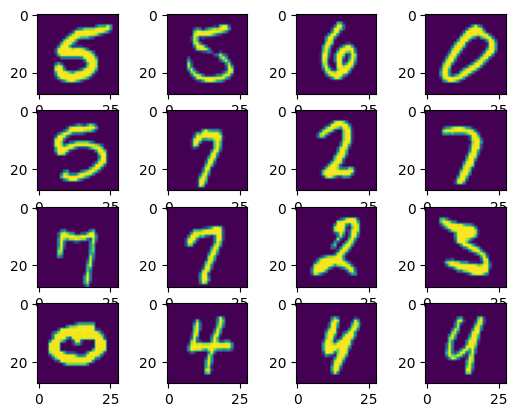

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
def show_nums(data):
    fig, axs = plt.subplots(4, 4)
    for i in range(0, 4):
        for j in range (0, 4):
            axs[i, j].imshow(pd.DataFrame(data).iloc[(i*4)+j].values.reshape(28, 28 ))
    plt.show()
show_nums(X_train_mnist)

In [4]:
# Lets make a basic model:
layers = [10, 10, 10]
model_mnist_basic = MLPClassifier(hidden_layer_sizes=layers, max_iter=50)
model_mnist_basic.fit(X_train_mnist, y_train_mnist)

c:\Users\trent\Documents\DSC412\units\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[10, 10, 10], max_iter=50)

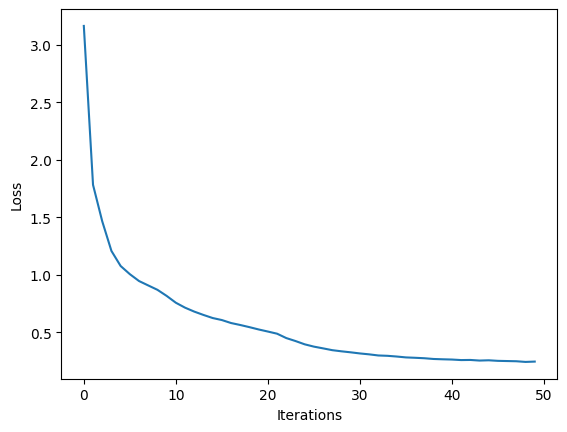

Score: 0.921


In [5]:
plt.figure()
plt.plot(model_mnist_basic.loss_curve_)
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()
print("Score:", model_mnist_basic.score(X_test_mnist, y_test_mnist))

In [6]:
num_epochs = 50
layers = [10, 10, 10]
model_mnist_basic = MLPClassifier(hidden_layer_sizes=layers, max_iter=1)
loss = []
score = []

batch_size = 100
classes = np.unique(y_train_mnist)
num_x_train_mod = len(X_train_mnist)/4


# Train the model in batches
for epoch in range(num_epochs):  # Number of epochs
    count = 0
    for batch_slice in gen_batches(len(X_train_mnist), batch_size):
        X_batch = X_train_mnist[batch_slice]
        y_batch = y_train_mnist[batch_slice]
        model_mnist_basic.partial_fit(X_batch, y_batch, classes=classes) 
        count += len(X_batch)
        if (not count%(num_x_train_mod) and (epoch == 0)):
            print(f"Trained on {count} data")
    
    if not epoch%4:
        loss.append(model_mnist_basic.loss_)
        score.append(model_mnist_basic.score(X_test_mnist, y_test_mnist))

    if not epoch%10:
        print("Epoch:", epoch)
        print("Loss", model_mnist_basic.loss_)
        print("Score", model_mnist_basic.score(X_test_mnist, y_test_mnist)) # This is a no no, you do not want to use the score as a learning metric, here it is for visualization
        # if you want to visualize your score you can use a validation dataset to look at that. However this eats into your training and test dataset.
        print()
print("Ding! Done Training!")


Trained on 14000 data
Trained on 28000 data
Trained on 42000 data
Trained on 56000 data
Epoch: 0
Loss 1.8074948535965831
Score 0.40164285714285713

Epoch: 10
Loss 0.8654409343203189
Score 0.778

Epoch: 20
Loss 0.41441126444742354
Score 0.887

Epoch: 30
Loss 0.2410008392522477
Score 0.9156428571428571

Epoch: 40
Loss 0.20887794717803942
Score 0.9217142857142857

Ding! Done Training!


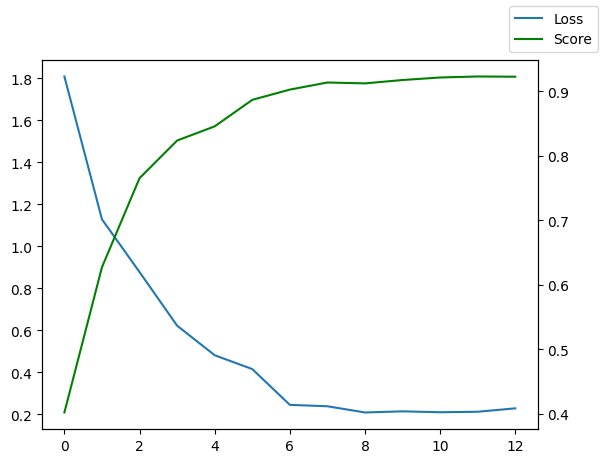

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(loss)
ax2.plot(score, 'g')
fig.legend(["Loss", "Score"])
plt.show()

# Hyper parameter tuning - pulling the levers

Our model learning pretty quickly! However there are levers we can pull to see if we can have our model learn more quickly or even have better accuracy. 

These parameters (literally the ones you pass into the machine learning model) are the levers we can pull. These paramters also extend outside the model - anything that can be changed can be thought of as a learning parameter. Profiling these parameters is known as Hyperparameter Tuning. 

Over time and getting more experience with models you will gain a better understanding of which levels you may want to pull to reduce the amount of profiling you will need to do. 

Lets look at a small example, lets say I want to hyper parameter tune on hidden layer width vs hidden layer depth. 


In [8]:
import warnings
max_layer_depth = 5
max_layer_width = 20
max_layer_width_step = 5
max_layer_depth_step = 1
num_iter = 10
# For now lets just do two iterations on the dataset
models = []
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
for d_i, depth in enumerate(range(max_layer_depth_step, max_layer_depth+1, max_layer_depth_step)):
    for w_i, width in enumerate(range(max_layer_width_step, max_layer_width+1, max_layer_width_step)):
        print()
        print("Depth: ", depth, "Width: ", width)
        layers = np.ones([depth], dtype=int) * width
        print("Layers:", layers)
        model = MLPClassifier(layers, max_iter=num_iter, early_stopping=True, n_iter_no_change=num_iter)
        model.fit(X_train_mnist, y_train_mnist)
        print("Loss:", model.loss_)
        print("Validation Score:", model.validation_scores_[-1])
        print()
        models.append(model)
        


Depth:  1 Width:  5
Layers: [5]
Loss: 2.3007623625748583
Validation Score: 0.10910714285714286


Depth:  1 Width:  10
Layers: [10]
Loss: 1.5969393099086808
Validation Score: 0.38410714285714287


Depth:  1 Width:  15
Layers: [15]
Loss: 1.0817790717442743
Validation Score: 0.5733928571428571


Depth:  1 Width:  20
Layers: [20]
Loss: 0.7722582124663605
Validation Score: 0.7526785714285714


Depth:  2 Width:  5
Layers: [5 5]
Loss: 1.6778829816031982
Validation Score: 0.30089285714285713


Depth:  2 Width:  10
Layers: [10 10]
Loss: 1.1517478609661043
Validation Score: 0.5601785714285714


Depth:  2 Width:  15
Layers: [15 15]
Loss: 1.2744113027317139
Validation Score: 0.5367857142857143


Depth:  2 Width:  20
Layers: [20 20]
Loss: 0.9425076622641106
Validation Score: 0.6553571428571429


Depth:  3 Width:  5
Layers: [5 5 5]
Loss: 1.7365390617399743
Validation Score: 0.29428571428571426


Depth:  3 Width:  10
Layers: [10 10 10]
Loss: 0.6486082915793852
Validation Score: 0.7617857142857143




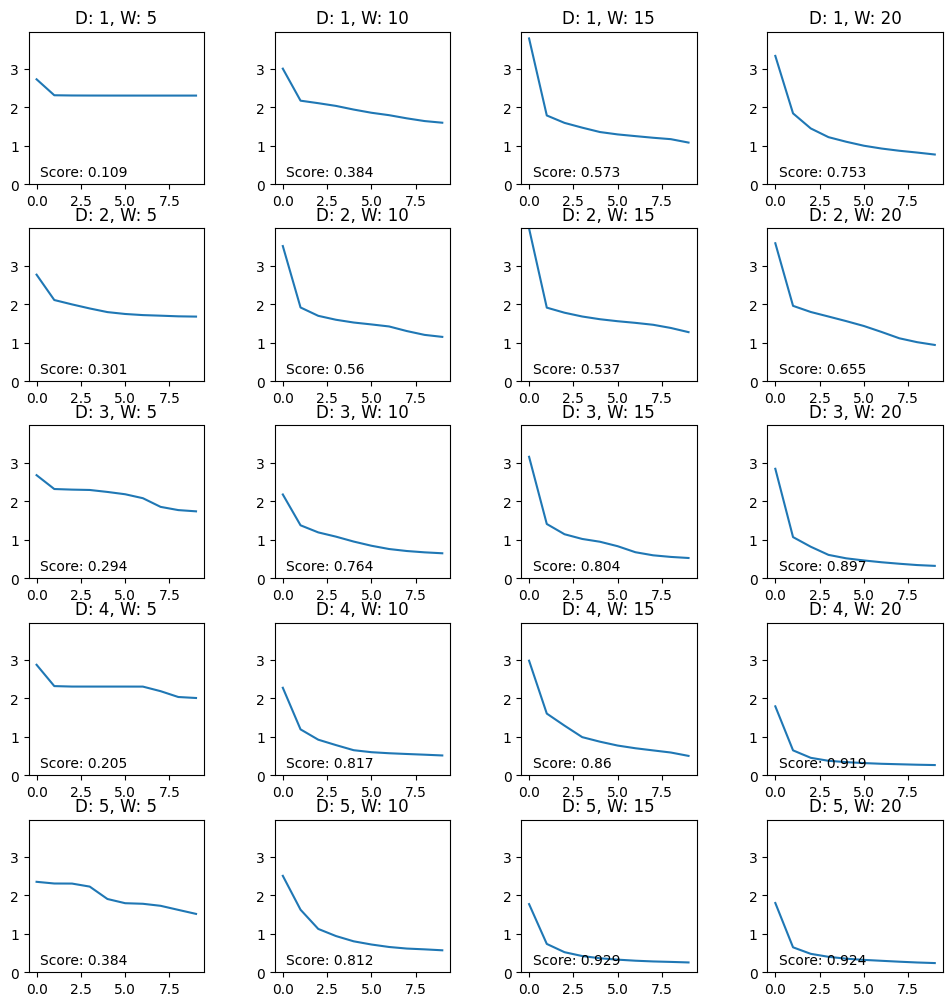

In [9]:
num_rows = int(max_layer_depth/max_layer_depth_step)
num_columns = int(max_layer_width/max_layer_width_step)

first_losses = [model.loss_curve_[0] for model in models]
max_loss = np.array(first_losses).max()

fig, ax = plt.subplots(num_rows, num_columns)
fig.set_size_inches(10, 10)
fig.tight_layout()
for row in range(num_rows):
    for col in range(num_columns):
        ax[row, col].set_title(f"D: {(row+1)*max_layer_depth_step}, W: {(col+1)*max_layer_width_step}")
        model_temp =  models[row * num_columns + col]
        ax[row, col].plot(model_temp.loss_curve_)
        ax[row, col].set_ylim(0, max_loss)
        ax[row, col].text(0.2, 0.2, f"Score: {round(model_temp.best_validation_score_, 3)}")

# Under Fitting and Over Fitting

One problem we can run into with our data is under and over training. 

Under training occurs when our model is capable of learning more about the data but is stopped before it's loss converges. 

Over training occurs when the model is trained on the training dataset too much - often training past convergence. Getting great scores on the training dataset but gets lower scores on the test dataset. This is usually a result of the model not having enough generalization of the patter you want it to learn and instead it is learning the pattern of the training dataset itself - which does not exist in test data. This tends to happen more with more complex models, as they can learn more complex patterns.

Lets look at an example of what an over fitting graph would look like.

Here is some advice on what IBM recommends for overfitting:
https://www.ibm.com/topics/overfitting



<img src="./images/Overfitting Example Graph.png " width="800">

Photo Credit: https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323

<img src="./images/Overfitting Example with Data.png" width="800">

Photo Credit: https://www.kdnuggets.com/2022/08/avoid-overfitting.html

Citations:
- https://mpfi.org/balancing-act-in-the-brain-excitatory-and-inhibitory-activity/
- Listed throughout notebook as comments